# Flask 

Flask is a micro framework for Python web development. A framework, in the
simplest terms, is a library or collection of libraries that aims to solve a part of a generic
problem instead of a complete specific one. When building web applications, there
are some problems that will always need to be solved, such as routing from URLs to
resources, inserting dynamic data into HTML, and interacting with an end user.


Flask is a micro framework because it implements only core functionality (including
routing) but leaves more advanced functionality (including authentication and
database ORMs) to extensions. The result of this is less initial setup for the first-time
user and more choice and flexibility for the experienced user. This is in contrast
with "fuller" frameworks, such as Django, which dictate their own ORM and
authentication technologies.

### Installing Flask
Installing Flask through pip could not be more straightforward. Simply run
the following:

In [10]:
pip install flask


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: C:\Users\vijith.v\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


Now, we'll create a basic web page and serve it using Flask's built-in server to
localhost. This means that we'll run a web server on our local machine that we can
easily make requests to from our local machine. This is very useful for development
but not suited for production applications. Later on, we'll take a look at how to serve
Flask web applications using the popular Apache web server.

Our application will be a single Python file. Create a directory in your home directory
called `firstapp` and a file inside this called `hello.py`. In the `hello.py` file, we'll write
code to serve a web page comprising the static string "Hello, World!". The code looks
as follows:

In [2]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def index():
    return "Hello, World!"

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\vijith.v\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


- The first line simply imports Flask from the package flask.
- The second line creates an instance of the Flask object using our module's name as a parameter. Flask uses this to resolve resources, and in complex cases, one can use something other than __name__ here. For our purposes, we'll always use __name__, which links our module to the Flask object.
- Line 3 is a Python decorator. Flask uses decorators for URL routing, so this line of code means that the function directly below it should be called whenever a user visits the main root page of our web application (which is defined by the single forward slash). If you are not familiar with decorators, these are beautiful Python shortcuts that seem a bit like black magic at first. In essence, they call a function that takes the function defined under the decorator (in our case, index()) and returns a modified function.
- The next two lines should also seem familiar. They define a very simple function that returns our message. As this function is called by Flask when a user visits our application, the return value of this will be what is sent in response to a user who requests our landing page.

### URL Routing in Flask

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
	return 'You are at home page.'

@app.route('/students')
def student():
	return 'You are at students page.'

@app.route('/teachers')
def teacher():
	return 'You are at teachers page.'

if __name__ == '__main__':
	app.run(port=5001)

## Deploying our application to production

As our application
is Python-based, we are a bit limited in how we can run our application on a web
server (many traditional web hosts are only configured to run PHP and/or .NET
applications). Let's consider how to serve Flask applications using a Virtual Private
Server (VPS) running Ubuntu Server, Apache, and WSGI.

From this point on, we'll maintain two environments. The first is our `development
environment`, which we just set up and where we'll write code and view its results
using the Flask server running on localhost (as we just did). The second will be
a `production environment`. This will be a server to which we can deploy our web
applications and make them accessible to the world. When we install new Python
libraries or other software on our development environment, we'll normally want to
mirror our actions in the production environment.

#### Setting up a Virtual Private Server

Although you could, in theory, host your web application on your local machine and
allow others to use it, this has some severe limitations. First of all, every time you
turned off your computer, your app would not be available. Also, your computer
probably connects to the Internet via an Internet Service Provider (ISP) and possibly
a wireless router. This means that your IP address is dynamic and changes regularly,
which makes it difficult for your applications' users to keep up! Finally, chances are
that you have an asymmetrical connection to the Internet, which means that your
upload speed is slower than your download speed.

Digital Ocean is often cited to have the simplest
process of signing up and creating a new machine. Once you select a provider,
you should be able to follow their respective instructions to fire up a VPS that runs
Ubuntu Server 14.04 and SSH into it. You'll have full control over the machine with
one slight difference: you won't have a display or a mouse. 

You'll enter commands on your local terminal, which will in fact be run on the
remote machine. Detailed instructions on how to connect to your VPS will be
given by the provider, but if you use Ubuntu, it should be as simple as running
the following:
```
ssh user@123.456.789.000
```
Once we connect to the VPS, installing Flask is the same process as it was previously:

```
sudo apt-get update
sudo apt-get install python-pip
pip install --user Flask
```

To install our web server, Apache, and WSGI, we will run the following:
```
sudo apt-get install apache2
sudo apt-get install libapache2-mod-wsgi
```

Apache is our web server. It will listen for web requests (which are generated by
our users visiting our web application using their browsers) and hand these requests
over to our Flask application. As our application is in Python, we also need WSGI
(Web Server Gateway Interface).

This is a common interface between web servers and Python applications, which
allows Apache to talk to Flask and vice versa. An overview of the architecture can
be seen in the following diagram:

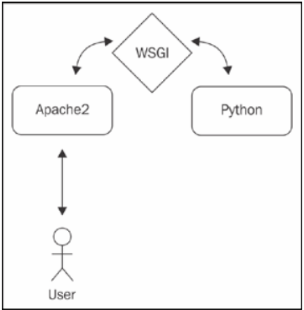

**Configuring our server**

Now that we've installed Apache, we can see our first results. You're probably used
to visiting websites using a URL, such as http://example.com. We'll access our web
applications using the IP address of our VPS directly. Your VPS should have a static
public address. Static means that it doesn't change periodically, and public means
that it is globally unique. When you connected to the VPS via SSH, you probably
used the public IP to do this. If you can't find it, run the following on your VPS and
you should see an inet addr section in the output, which contains your public IP:
ifconfig

The IP address should look similar to 123.456.78.9. Enter your IP address into your
browser's address bar, and you should see a page saying "Apache2 Ubuntu Default
Page: It Works!" or something similar.

This means that we can now serve web content to anyone with an Internet
connection! However, we still have to:
```
• Copy our code to the VPS
• Link up Apache and Flask
• Configure Apache to serve our Flask application
```
For the first step, we'll set up a Git repository on our local machine and clone the
repository to the VPS. For the second step, we'll use the WSGI module that we installed
with Apache. Finally, we'll take a look at how to write a virtual host to have Apache
serve our Flask application by default.

### Installing and using Git

Git is a version control system. A version control system, among other things, saves
multiple versions of our code base automatically. This is great to undo accidental
changes or even deletions; we can simply revert to a previous version of our code.
It also includes lots of functionality for distributed development—that is, many
developers working on a single project. We'll use it mainly for its backup and
deployment features, however.

To install Git on your local machine and VPS, run the following commands on each:
```
sudo apt-get update
sudo apt-get install git
```

On your local machine, open a terminal and change the directory to the Flask
application. Initialize a new repository and link it to your remote Git repository
via the following commands:
```
cd firstapp
git init
git remote add origin <your-git-url>
```

Tell git who you are, to allow it to automatically add metadata to your code
changes, as follows:
```
git config --global user.email "you@example.com"
git config --global user.name "Your Name"
```

Git allows you full control over which files are part of your repository and which
aren't. Even though we initialized the Git repo in our firstapp directory, our repo
currently contains no files. Add our application to the repo, commit, and then push
it, as follows:

```
git add hello.py
git commit -m "Initial commit"
git push -u origin main
```

## Using Templates in Flask

Combining static HTML with dynamic content for creating a web page. But it's messy, and we don't want to hack away at Python strings for building our web pages. Mixing HTML and Python is not ideal for a few reasons: for one, it means if we ever want to change static text, such as that which appears in our headings, we have to edit our Python files, which also involves reloading these files into Apache. If we hire frontend developers to work on HTML,
we run the risk of them breaking the unfamiliar Python code by mistake, and it's far more difficult to structure any other frontend code such as JavaScript and CSS correctly. Ideally, we should aim for complete segregation between the frontend and backend components. We can achieve this to a large extent using Jinja, but as with most aspects of life, some compromise will be necessary.

### Introducing Jinja

Jinja is a Python template engine. It allows us to easily define dynamic blocks of
HTML which are populated by Python. HTML templates are useful even for static
websites which have multiple pages. Usually, there are some common elements,
such as headers and footers, on every page. Although it is possible to maintain each
page individually for static websites, this requires that a single change be made in
multiple places if the change is made to a shared section. Flask was built on top of
Jinja, so although it is possible to use Jinja without Flask, Jinja is still an inherent part
of Flask, and Flask provides several methods to work directly with Jinja. Generally,
Flask assumes nothing about the structure of your application except what you tell
it, and prefers providing functionality through optional plugins. Jinja is somewhat of
an exception to this. Flask gives you Jinja by default, and assumes that you store all
your Jinja templates in a subdirectory of your application named templates.

Once we've created templates, we'll make calls from our Flask app to render these
templates. Rendering involves parsing the Jinja code, inserting any dynamic data,
and creating pure HTML to be returned to a user's browser. All of this is done
behind the scenes though, so it can get a bit confusing as to what is being done
where. We'll take things one step at a time.



The `render_template` function is the magic which takes a Jinja template as input
and produces pure HTML, capable of being read by any browser, as the output.
For now, some of the magic is lost, as we'll give it pure HTML as input and view
the same as output in our browser.

In [11]:
!pip install Jinja2

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl (15 kB)


#### Rendering a basic template

In [14]:
%%writefile templates/index.html
<!DOCTYPE html>
<html>
<head>
    <title>Jinja Template</title>
</head>
<body>
    <h1>Hello, {{ user }}!</h1>

    <h2>Your favorite languages:</h2>
    <ul>
        {% for lang in langs %}
            <li>{{ lang }}</li>
        {% endfor %}
    </ul>

    {% if user == "Vijith" %}
        <p>Welcome, master user!</p>
    {% else %}
        <p>Welcome, guest!</p>
    {% endif %}
</body>
</html>


Writing templates/index.html


In [1]:
%%writefile app.py

from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def home():
    # Sending data to template
    name = "Vijith"
    languages = ["Python", "JavaScript", "C++"]
    return render_template("index.html", user=name, langs=languages)

if __name__ == '__main__':
    app.run(debug=True)


Overwriting app.py


In [2]:
!python app.py

^C


### Passing dynamic data to our template

In [ ]:
%%writefile templates/profile.html

<!DOCTYPE html>
<html>
<head>
    <title>User Profile</title>
</head>
<body>

    <h1>User Profile</h1>
    
    <b>Name:</b> {{ username }}<br />
    <b>Email:</b> {{ email }}<br />
    <p><b>About:</b> {{ bio }}</p>

</body>
</html>

In [ ]:
%%writefile app2.py

from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def profile():
    # Dynamic data to be passed to template
    return render_template("profile.html",
                           username="Aarav Desai",
                           email="aarav.desai@example.com",
                           bio="Lifelong learner. Python developer. Nature lover.")

if __name__ == "__main__":
    app.run(debug=True)


### Using Jinja Objects

The first thing to learn is how Jinja handles objects. All of the basic Python data
structures, such as variables, objects, lists, and dictionaries, can be understood by
Jinja and can be processed in a very similar way to what we are used to in Python.
For example, instead of passing each of the three components of our article separately
to our template, we could have passed in the first_article object and dealt with
the separation in Jinja. Let's see how to do that. Change the Python code to pass in
a single-named argument to render_template, that is first_article, and the
frontend code to grab the bits we need from this.

In [ ]:
%%writefile app3.py

from flask import Flask, render_template

app = Flask(__name__)

@app.route('/')
def show_product():
    product_info = {
        'name': 'Wireless Headphones',
        'brand': 'SoundMax',
        'price': 129.99,
        'features': [
            'Bluetooth 5.3',
            'Noise Cancellation',
            '20-hour Battery Life',
            'Built-in Microphone'
        ]
    }

    # Passing the entire dictionary as one object named 'product'
    return render_template('product.html', product=product_info)

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
%%writefile templates/profile.html

<!DOCTYPE html>
<html>
<head>
    <title>User Profile</title>
</head>
<body>

    <h1>User Profile</h1>
    
    <b>Name:</b> {{ username }}<br />
    <b>Email:</b> {{ email }}<br />
    <p><b>About:</b> {{ bio }}</p>

</body>
</html>


### Adding looping logic to our template

The Python code defines a list of student dictionaries. render_template() sends this list into the HTML as students. Jinja's {% for student in students %} block loops through each student. Inside the loop, {{ student.name }}, {{ student.age }}, and {{ student.grade }} pull individual values for display.

In [ ]:
%%writefile students.html

<!DOCTYPE html>
<html>
<head>
    <title>Student Roster</title>
</head>
<body>
    <h1>Class Students</h1>
    <ul>
    {% for student in students %}
        <li>
            <b>{{ student.name }}</b> (Age: {{ student.age }}, Grade: {{ student.grade }})
        </li>
    {% endfor %}
    </ul>
</body>
</html>


In [ ]:
%%writefile app4.py

from flask import Flask, render_template

app = Flask(__name__)

@app.route("/")
def student_list():
    students = [
        {"name": "Aarav", "age": 15, "grade": "10th"},
        {"name": "Diya", "age": 14, "grade": "9th"},
        {"name": "Kabir", "age": 16, "grade": "11th"},
    ]
    return render_template("students.html", students=students)

if __name__ == "__main__":
    app.run(debug=True)


### Put and Delete

In [11]:
%%writefile api.py

from flask import Flask, jsonify, request

app = Flask(__name__)

##Initial Data in my to do list
items = [
    {"id":1, "name": "Item 1", "description": "This is item 1"},
    {"id":2, "name": "Item 2", "description": "This is item 2"},
]

@app.route('/')
def home():
    return "Welcome to the Sample To Do List App"

## Get: Retrieve all the items
@app.route('/items', methods=['GET'])
def get_items():
    return jsonify(items)

##get: Retrieve a specic item by Id
@app.route('/items/<int:item_id>', methods=['GET'])
def get_item(item_id):
    item = next((item for item in items if item["id"]==item_id), None)
    if item is None:
        return jsonify({"error":"item not found"})
    return jsonify(item)

## Post : create a new task
@app.route('/items',methods=['POST'])
def create_item():
    if not request.json or not 'name' in request.json:
        return jsonify({"error":"item not found"})
    new_item={
        "id": items[-1]["id"]+1 if items else 1,
        "name":request.json['name'],
        "description":request.json['description']
}
    items.append(new_item)
    return jsonify(new_item)

## Put : Update an existing item
@app.route('/items/<int:item_id>', methods=['PUT'])
def update_item(item_id):
    item = next((item for item in items if item["id"]==item_id), None)
    if item is None:
        return jsonify({"error":"item not found"})
    item['name'] = request.json.get('name', item['name'])
    item['description'] = request.json.get('description', item['description'])
    return jsonify(item)

## Delete: Delete an item
@app.route('/items/<int:item_id>', methods=['DELETE'])
def delete_item(item_id):
    global items
    item = [item for item in items if item["id"]!=item_id]
    return jsonify({"result":"Item deleted"})

        
if __name__ == "__main__":
    app.run(debug=True)

Overwriting api.py


In [5]:
%%writefile sample.json

{"name":"New Item", "description":"This is a new item"}
{"name":"Updated Item", "description":"This has been updated"}

Writing sample.json
